<a href="https://colab.research.google.com/github/jackyjack00/Machine_Learning_Deep_Learning_LAB/blob/main/Es2_2_GaussianMixture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Studying GMM

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

x , y = load_iris( return_X_y = True )

x = StandardScaler().fit_transform(x)

x.shape

(150, 4)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA( 2 )
#x = pca.fit_transform( x )

In [ ]:
def gmm_bic_score ( estimator , x ):
  return - estimator.bic( x ) 


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  silhouette_score

grid = {
    "n_components" : range(2, 10) ,
    "covariance_type" : ["full", "tied", "diag", "spherical"] ,
}


grid_search = GridSearchCV( GaussianMixture() , grid , cv = 6 , scoring = gmm_bic_score , verbose = True)
grid_search.fit(x)
print( grid_search.best_params_ )


Fitting 6 folds for each of 32 candidates, totalling 192 fits
{'covariance_type': 'tied', 'n_components': 3}


+---+------------+-------------+-----------+--------------------+
| K | Rand Score | Homogeneity | V Measure |     Silhouette     |
+---+------------+-------------+-----------+--------------------+
| 3 |    1.0     |     1.0     |    1.0    | 0.3811261580543803 |
+---+------------+-------------+-----------+--------------------+


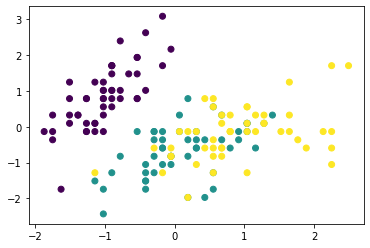

In [ ]:
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import rand_score , adjusted_rand_score , v_measure_score, silhouette_score , homogeneity_score

plt.scatter( x[:,0] , x[:,1] , c = y)
y_pred = y
tbl = PrettyTable(["K" , "Rand Score" , "Homogeneity", "V Measure" , "Silhouette"])
tbl.add_row([ 3 , rand_score(y, y_pred) , homogeneity_score( y , y_pred) ,  v_measure_score(y,y_pred) , silhouette_score(x , y_pred) ] )
print(tbl)

+---+--------------------+--------------------+--------------------+--------------------+
| K |     Rand Score     |    Homogeneity     |     V Measure      |     Silhouette     |
+---+--------------------+--------------------+--------------------+--------------------+
| 3 | 0.9495302013422818 | 0.8639756867013153 | 0.8641855068202221 | 0.3854413862447881 |
+---+--------------------+--------------------+--------------------+--------------------+


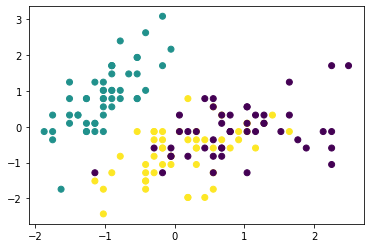

In [ ]:
clf = grid_search.best_estimator_

y_pred = clf.predict(x)

plt.scatter( x[:,0] , x[:,1] , c = y_pred)
tbl = PrettyTable(["K" , "Rand Score" , "Homogeneity", "V Measure" , "Silhouette"])
tbl.add_row([ 3 , rand_score(y, y_pred) , homogeneity_score( y , y_pred) ,  v_measure_score(y,y_pred) , silhouette_score(x , y_pred) ] )
print(tbl)

Introducing some function to draw gmm components

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

def draw_ellipse ( position , covariance , ax = None , **kwargs):
  ax = ax or plt.gca()
  
  if covariance.shape == (2,2):
    U , s , Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2( U [1,0] , U[0,0]))
    width , height = 2 * np.sqrt(s)
  else:
    angle = 0
    width , height = 2 * np.sqrt(covariance)

  for nsig in range(1,4):
    ax.add_patch( Ellipse(position, nsig*width , nsig*height , angle , **kwargs ))


def plot_gmm( gmm , X , label = True , ax = None):
  ax = ax or plt.gca()
  labels = gmm.fit(X).predict(X)
  if label:
    ax.scatter( X[:, 0], X[: , 1] , c = labels , s = 40 , cmap="viridis" , zorder = 2)
  else:
    ax.scatter( X[:, 0], X[: , 1] ,s = 40 , zorder = 2)
  
  ax.axis("equal")

  w_factor = 0.2/gmm.weights_.max()

  for pos , covar, w in zip(gmm.means_ , gmm.covariances_ , gmm.weights_ ):
    draw_ellipse( pos , covar , alpha = w * w_factor)

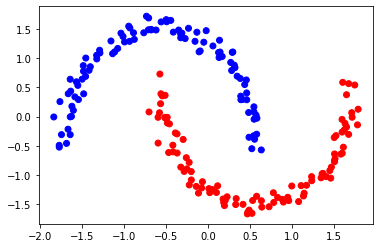

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X_moon , y_moon = make_moons( 200 , noise=.05 , random_state = 42 )

X_moon = StandardScaler().fit_transform(X_moon)

plt.scatter(X_moon[:,0] , X_moon[:,1] , c = y_moon , cmap="bwr")

In [ ]:
from sklearn.mixture import GaussianMixture
predictions = {}

for iteration in range(2,16):
  clf = GaussianMixture( n_components = iteration )
  y_pred = clf.fit_predict(X_moon)
  predictions[iteration] = (clf , y_pred)

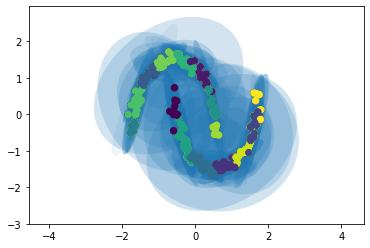

In [ ]:
for i in range(2,16):
  gmm = predictions[i][0]
  plot_gmm(gmm , X_moon)